In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Classic ML models
y_pred_linreg = np.load("../data/lr_val_predictions.npy")
y_pred_knn = np.load("../data/knn_val_predictions.npy")
y_pred_nn = np.load("../data/nn_val_predictions.npy")

# Literature-based models
y_pred_xgb_paper1 = np.load("../data/paper1_xgb_val_predictions.npy")
y_pred_rf_paper2 = np.load("../data/paper2_rf_val_predictions.npy")
y_pred_xgb_paper2 = np.load("../data/paper2_xgb_val_predictions.npy")

# Load actual values
y_val = np.load("../data/y_val.npy")  # Make sure you saved y_val during preprocessing


In [21]:
models = {
    "Linear Regression": y_pred_linreg,
    "KNN Regressor": y_pred_knn,
    "Neural Network": y_pred_nn,
    "Paper 1 XGBoost": y_pred_xgb_paper1,
    "Paper 2 RF": y_pred_rf_paper2,
    "Paper 2 XGBoost": y_pred_xgb_paper2
}

metrics_dict = {}

for name, preds in models.items():
    rmse, mse, mae, r2 = compute_metrics(y_val, preds)
    metrics_dict[name] = {"RMSE": rmse, "MSE": mse, "MAE": mae, "R²": r2}

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_dict).T
metrics_df = metrics_df.sort_values(by="R²", ascending=False)
metrics_df


,RMSE,MSE,MAE,R²
Paper 1 XGBoost,24365.083983,5.936573e+08,14926.665200,0.922603
Paper 2 XGBoost,26899.526247,7.235845e+08,16191.000067,0.905664
Neural Network,27936.958181,7.804736e+08,16453.650542,0.898248
Paper 2 RF,28819.159754,8.305440e+08,17506.191890,0.891720
Linear Regression,29536.148673,8.723841e+08,18349.901643,0.886265
KNN Regressor,36009.762548,1.296703e+09,20560.286289,0.830946


<ipython-input-23-ecf9d20d7807>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df["RMSE"], palette="viridis")


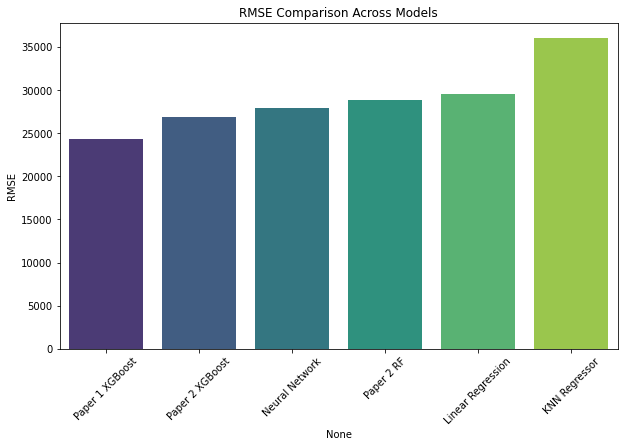

<ipython-input-23-ecf9d20d7807>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df["MAE"], palette="magma")


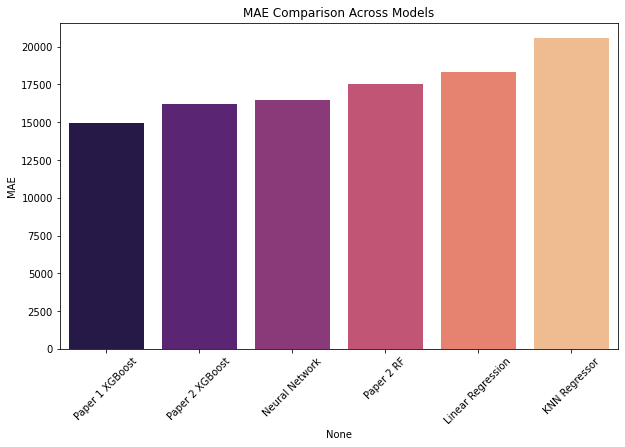

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=metrics_df.index, y=metrics_df["RMSE"], palette="viridis")
plt.ylabel("RMSE")
plt.title("RMSE Comparison Across Models")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=metrics_df.index, y=metrics_df["MAE"], palette="magma")
plt.ylabel("MAE")
plt.title("MAE Comparison Across Models")
plt.xticks(rotation=45)
plt.show()


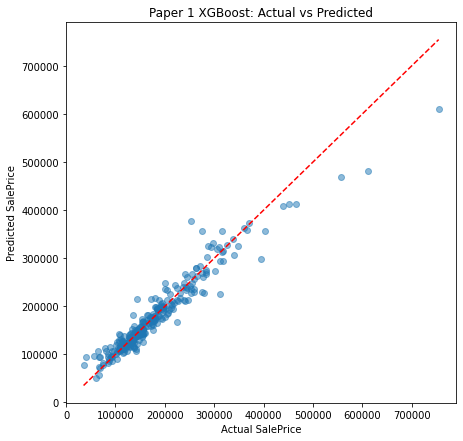

In [24]:
best_model_name = metrics_df.index[0]
best_preds = models[best_model_name]

plt.figure(figsize=(7,7))
plt.scatter(y_val, best_preds, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title(f"{best_model_name}: Actual vs Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()


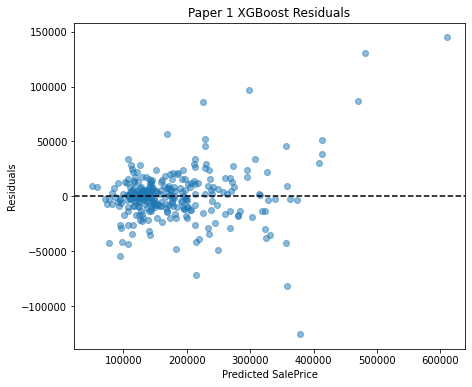

In [25]:
residuals = y_val - best_preds
plt.figure(figsize=(7,6))
plt.scatter(best_preds, residuals, alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title(f"{best_model_name} Residuals")
plt.show()


In [26]:
metrics_df.to_csv("../data/model_comparison_metrics.csv")
